In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST dataset from keras.datasets

In [46]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [47]:
X_train.shape

(60000, 28, 28)

In [48]:
Y_train.shape

(60000,)

In [49]:
X_test.shape

(10000, 28, 28)

Train --> 60,000 Test --> 10,000

Grayscale 200*200(Dimension)

In [50]:
#printing a image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

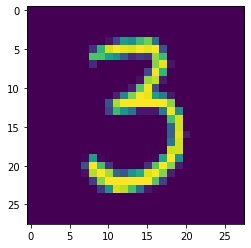

3


In [51]:
#displaying the image
plt.imshow(X_train[50])
plt.show()

#corresponding label
print(Y_train[50])

In [52]:
#unique values
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [53]:
#scaling the images
X_train = X_train/225
X_test = X_test/225

Building the neural Network

In [54]:
#setting up the layers
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
])

In [55]:
#compiling the NN
model.compile(
              optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [56]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2916 - accuracy: 0.9151
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1357 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1012 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0825 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0691 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0608 - accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0520 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9848
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

Accuracy on text data

In [57]:
loss,accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1114 - accuracy: 0.9705


In [58]:
print(X_test.shape)

(10000, 28, 28)


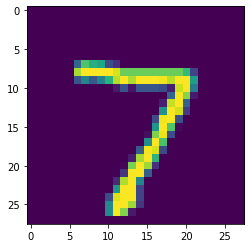

In [59]:
#first datapoint in X_test
plt.imshow(X_test[0])
plt.show()

In [60]:
print(Y_test[0])

7


In [61]:
Y_pred = model.predict(X_test)

In [62]:
print(Y_pred[0])

[1.0941029e-03 1.6716665e-01 2.8769943e-01 7.5520694e-01 2.6541054e-03
 1.6272726e-05 8.1976284e-09 9.9998653e-01 1.2015957e-01 5.9643602e-01]


In [63]:
#converting prediction probablities to class labels
label_for_first_test_img = np.argmax(Y_pred[0])
print(label_for_first_test_img)

7


In [64]:
#converting prediction probablities to class labels for all test data
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 8, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test = True Labels

Y_pred_label = Prdeicted Labels

Confusion Matrix

In [65]:
conf_mat = confusion_matrix(Y_test,Y_pred_label)
print(conf_mat)

tf.Tensor(
[[ 958    1    2    0    1    6    4    1    6    1]
 [   0 1122    1    2    0    3    1    0    6    0]
 [   2    5  994    2    6    2    1   10    9    1]
 [   0    0    6  965    0   19    0    4    6   10]
 [   2    1    1    1  967    0    4    0    2    4]
 [   2    0    0    7    1  869    0    1    7    5]
 [   2    3    0    1    5   12  927    1    7    0]
 [   0    5    9    2    4    0    0  994    5    9]
 [   1    0    1    3    7    6    0    2  953    1]
 [   1    2    1    5   29    5    0    4    7  955]], shape=(10, 10), dtype=int32)


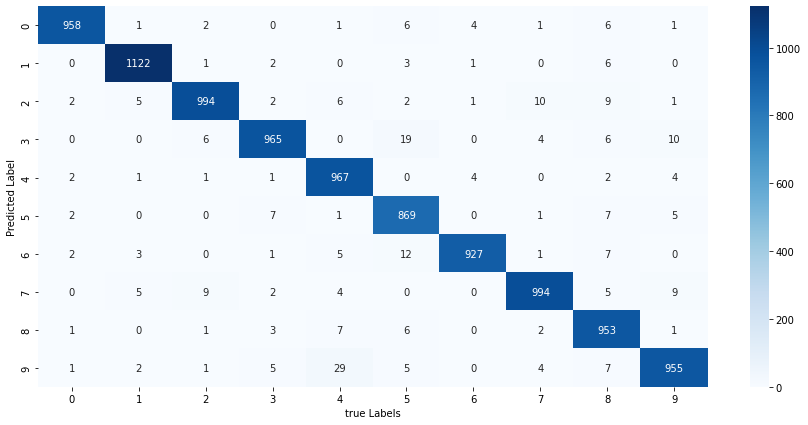

In [66]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('true Labels')
plt.ylabel('Predicted Label')
plt.show()

Building a Predictive System

In [67]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)


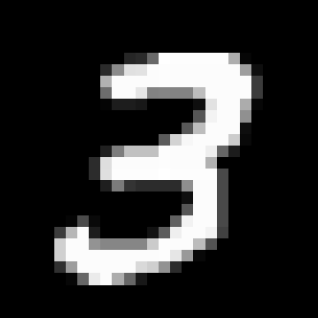

In [68]:
cv2_imshow(input_image)

In [69]:
input_image.shape

(318, 318, 3)

In [70]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [71]:
grayscale.shape

(318, 318)

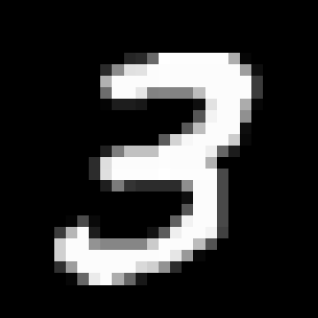

In [72]:
cv2_imshow(grayscale)

In [73]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [74]:
input_image_resize.shape

(28, 28)

In [75]:
input_image_resize = input_image_resize/255

In [76]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [77]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

[[8.3705515e-11 3.8708749e-01 7.2717667e-04 1.0000000e+00 5.7274063e-10
  9.8421746e-01 1.0526512e-14 1.9026160e-02 9.4960749e-02 1.9335958e-01]]


In [78]:
finale = np.argmax(input_prediction)
print(finale)

3


Predictive System

In [93]:
input_image_path = '/content/6.png'
input_image = cv2.imread(input_image_path)


In [94]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [95]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [96]:
input_image_resize = input_image_resize/255

In [97]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [98]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

[[8.7219477e-04 6.2342151e-05 7.2478652e-03 9.9834477e-05 4.6466649e-02
  9.4868362e-01 9.9999726e-01 6.8459763e-06 6.4981073e-01 3.3601154e-07]]


In [99]:
finale = np.argmax(input_prediction)
print(finale)

6
